# Annie Yan
**Steam Game Recommender System**

annie.yq.yan@gmail.com

<h1 align='center'>Steam Game Recommender</h1>
<h2 align='center'>User Independent and Cosine Similarity Modeling</h2>

# Table of Contents

* [Introduction](#Introduction)
* [Methodology](#Methodology)
    * [Programming Language Info](#Programming)
    * [Importing Data](#Data)
* [Modeling](#Modeling)
    * [User Independent Models](#Basic)
    * [Content/Game Similarity Recommendation Model](#Cosim)
* [Concluding Remarks](#Conclude)

<a name='Introduction'></a>
## Introduction

**Purpose:** To create a recommender system that will be able to output a game recommendation based on previous games played.

Recommendation systems/models can range from very basic to highly complex. Some basic user independent options will be explored first, then a more complex model that examines the similarity of games based on game description and other features (e.g. tags, genre, platform support, price, etc) will be built.

Please be aware that the complex models can be computationally expensive and require significant runtime and/or memory usage. 

The models that have been run within this notebook were supported by 32GB of memory and a strong, modern CPU. 

This notebook is 3 of 4 notebooks to be used for this project. This specific notebook will focus the creation of basic and advanced recommendation models.  

Please refer to:
- Part 1 for data pre-processing, where the initial major data cleaning was completed.
- Part 2 for exploratory data analysis and visualization, with some additional data wrangling
- Part 4 for model evaluation

<a name='Methodology'></a>
## Methodology

<a name='Programming'></a>
### Programming Language
Python with additionally imported libaries will be the language of choice for this project.

The basic libraries needed are as follows: 

In [93]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns

In [94]:
# Shows all columns when previewing information
pd.set_option('display.max_columns', None)

In [95]:
# Printing version of library being used. 
print('NumPy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)
print('Seaborn Version: ', sns.__version__)
print('Matplotlib Version: ', mpl.__version__)

NumPy Version:  1.23.1
Pandas Version:  1.4.3
Seaborn Version:  0.12.2
Matplotlib Version:  3.7.1


Version control, for purpose of troubleshooting in the event of version incompatibility.

These are the versions of the libraries that were used when running this notebook:
- NumPy Version:  1.23.1
- Pandas Version:  1.4.3
- Seaborn Version:  0.12.2
- Matplotlib Version:  3.7.1


Other modeling libraries have been imported as necessary, primarily from scikit-learn/sklearn. 

<a name='Data'></a>
### Importing Data

The game data needed for various analyses are imported as below: 

#### Game Data

The basic game data without variable encoding has also been loaded in for reference purposes, if needed. 

In [101]:
games = pd.read_csv('clean_data/cleaned_steam_games.csv', index_col='AppID')
# alt_games = pd.read_csv('clean_data/cleaned_alt_steam_games.csv')

In [102]:
# Column reference
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      70563 non-null  object 
 1   Estimated owners          70563 non-null  object 
 2   Required age              70563 non-null  int64  
 3   Price                     70563 non-null  float64
 4   DLC count                 70563 non-null  int64  
 5   About the game            70563 non-null  object 
 6   Supported languages       70563 non-null  object 
 7   Full audio languages      70563 non-null  object 
 8   Windows                   70563 non-null  int64  
 9   Mac                       70563 non-null  int64  
 10  Linux                     70563 non-null  int64  
 11  Metacritic score          70563 non-null  int64  
 12  Positive                  70563 non-null  int64  
 13  Negative                  70563 non-null  int64  
 14  Ach

The `alt_games` dataframe has been commented out at this time. Separate analysis can be completed using this dataset as it contains fewer games (rows), but more scoring features (columns). 

This will not be addresssed within this notebook.

The primarily used game data for modeling will come from the `final_games` .pkl file below as it has a clean, comprehensive encoding of all the object-type columns as noted by the `games` dataframe. 

In [103]:
# Read in cleaned game data .pkl file
final_games = pd.read_pickle('clean_data/final_steam_games.pkl')

In [104]:
# Checking size and information
final_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70563 entries, 10 to 2458330
Columns: 550 entries, Required age to tags_eSports
dtypes: Sparse[int32, 0](521), float64(2), int64(13), uint8(14)
memory usage: 19.4 MB


In [105]:
# Checking shape
final_games.shape

(70563, 550)

In [106]:
# Checking a sample of the dataframe
final_games.head()

,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Median playtime forever,Release year,Release month,Weighted_Vote_Sentiment,est_owners_0 - 0,est_owners_0 - 20000,est_owners_100000 - 200000,est_owners_1000000 - 2000000,est_owners_10000000 - 20000000,est_owners_100000000 - 200000000,est_owners_20000 - 50000,est_owners_200000 - 500000,est_owners_2000000 - 5000000,est_owners_20000000 - 50000000,est_owners_50000 - 100000,est_owners_500000 - 1000000,est_owners_5000000 - 10000000,est_owners_50000000 - 100000000,categories_Captions available,categories_Co-op,categories_Commentary available,categories_Cross-Platform Multiplayer,categories_Full controller support,categories_In-App Purchases,categories_Includes Source SDK,categories_Includes level editor,categories_LAN Co-op,categories_LAN PvP,categories_MMO,categories_Mods,categories_Mods (require HL2),categories_Multi-player,categories_Online Co-op,categories_Online PvP,categories_Partial Controller Support,categories_PvP,categories_Remote Play Together,categories_Remote Play on Phone,categories_Remote Play on TV,categories_Remote Play on Tablet,categories_Shared/Split Screen,categories_Shared/Split Screen Co-op,categories_Shared/Split Screen PvP,categories_Single-player,categories_Stats,categories_Steam Achievements,categories_Steam Cloud,categories_Steam Leaderboards,categories_Steam Trading Cards,categories_Steam Turn Notifications,categories_Steam Workshop,categories_SteamVR Collectibles,categories_Tracked Controller Support,categories_Tracked Motion Controller Support,categories_VR Only,categories_VR Support,categories_VR Supported,categories_Valve Anti-Cheat enabled,genres_Accounting,genres_Action,genres_Adventure,genres_Animation & Modeling,genres_Audio Production,genres_Casual,genres_Design & Illustration,genres_Early Access,genres_Education,genres_Free to Play,genres_Game Development,genres_Gore,genres_Indie,genres_Massively Multiplayer,genres_Movie,genres_Nudity,genres_RPG,genres_Racing,genres_Sexual Content,genres_Simulation,genres_Sports,genres_Strategy,genres_Unlabeled,genres_Video Production,genres_Violent,genres_Web Publishing,tags_1980s,tags_1990's,tags_2.5D,tags_2D,tags_2D Fighter,tags_2D Platformer,tags_360 Video,tags_3D,tags_3D Fighter,tags_3D Platformer,tags_3D Vision,tags_4 Player Local,tags_4X,tags_6DOF,tags_8-bit Music,tags_ATV,tags_Abstract,tags_Action,tags_Action RPG,tags_Action RTS,tags_Action Roguelike,tags_Action-Adventure,tags_Addictive,tags_Adventure,tags_Agriculture,tags_Aliens,tags_Alternate History,tags_Ambient,tags_America,tags_Animation & Modeling,tags_Anime,tags_Arcade,tags_Archery,tags_Arena Shooter,tags_Artificial Intelligence,tags_Assassin,tags_Asymmetric VR,tags_Asynchronous Multiplayer,tags_Atmospheric,tags_Audio Production,tags_Auto Battler,tags_Automation,tags_Automobile Sim,tags_BMX,tags_Base Building,tags_Base-Building,tags_Baseball,tags_Based On A Novel,tags_Basketball,tags_Batman,tags_Battle Royale,tags_Beat 'em up,tags_Beautiful,tags_Benchmark,tags_Bikes,tags_Birds,tags_Blood,tags_Board Game,tags_Boss Rush,tags_Bowling,tags_Boxing,tags_Building,tags_Bullet Hell,tags_Bullet Time,tags_CRPG,tags_Capitalism,tags_Card Battler,tags_Card Game,tags_Cartoon,tags_Cartoony,tags_Casual,tags_Cats,tags_Character Action Game,tags_Character Customization,tags_Chess,tags_Choices Matter,tags_Choose Your Own Adventure,tags_Cinematic,tags_City Builder,tags_Class-Based,tags_Classic,tags_Clicker,tags_Co-op,tags_Co-op Campaign,tags_Coding,tags_Cold War,tags_Collectathon,tags_Colony Sim,tags_Colorful,tags_Combat,tags_Combat Racing,tags_Comedy,tags_Comic Book,tags_Competitive,tags_Conspiracy,tags_Controller,tags_Conversation,tags_Cooking,tags_Cozy,tags_Crafting,tags_Creature Collector,tags_Cricket,tags_Crime,tags_Crowdfunded,tags_Cult Classic,tags_Cute,tags_Cyberpunk,tags_Cycling,tags_Dark,tags_Dark Comedy,tags_Dark Fantasy,tags_Dark Humor,tags_Dating Sim,tags_Deckbuilding,tags_Demons,tags_Design & Il

<a name='Modeling'></a>
## Modeling

<a name='Basic'></a>
### User Independent System

The most basic recommendation system when there is no knowledge about a user is one that uses some existing scoring metric information available about each product. It is a broad recommendation that does not take into account any preferences, but only looks at the most popular items as rated by other users. 

In this case, there are 4 possible pre-existing columns that can be used for this: `Metacritic score`, `Positive`, `Recommendations` and the previously engineered `Weighted_Vote_Sentiment`.

In [109]:
final_games[['Metacritic score', 'Positive', 'Negative', 'Recommendations', 'Weighted_Vote_Sentiment']].head()

,Metacritic score,Positive,Negative,Recommendations,Weighted_Vote_Sentiment
AppID,,,,,
10,88,198387,5135,122770,0.002160
20,0,5677,923,4722,0.000053
30,79,5179,566,3246,0.000052
40,0,1929,428,1570,0.000017
50,0,14333,718,12374,0.000152


Each of these will be briefly explored to see if there is a preferred rating system to use or if there are any significant differences in the top games recommended.

### Most Simplistic Recommender

#### Considerations for `Metacritic score`:

In [15]:
games['Metacritic score'].describe()

count    70563.000000
mean         3.824625
std         16.404922
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         97.000000
Name: Metacritic score, dtype: float64

In [16]:
games.shape

(70563, 25)

In [17]:
games[games['Metacritic score']!=0]['Metacritic score'].shape

(3714,)

In [18]:
no_mscore = games[games['Metacritic score']==0]['Metacritic score'].value_counts().values[0]
yes_mscore = games[games['Metacritic score']!=0]['Metacritic score'].shape[0]

In [19]:
print(f'There are {no_mscore} games with either a zero score or no Metacritic score associated.')
print(f'There are {yes_mscore} games with a Metacritic score.')

There are 66849 games with either a zero score or no Metacritic score associated.
There are 3714 games with a Metacritic score.


In [134]:
3714/70563

0.05263381658943072

Based on the fact that there are only about 3,714 games with `Metacritic score`s, it may not be the best metric even for an arbitrary scoring ranked recommendation. Noteable scores are only available for about 5% of all products in the dataframe, which is not sufficiently robust or comprehensive to create a ranking. 

#### Considerations for `Postiive` Vote Count:

In [20]:
games['Positive'].describe()

count    7.056300e+04
mean     1.090216e+03
std      2.654611e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+01
75%      5.900000e+01
max      5.764420e+06
Name: Positive, dtype: float64

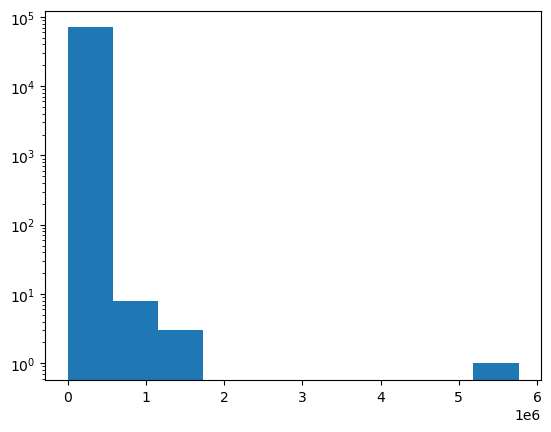

In [21]:
# Basic overview of positive vote distribution
plt.figure()

plt.hist(games['Positive'], log=True)
plt.show()

In [22]:
# Checking number of games with a non-zero positive votes and games without any votes
no_pscore = games[games['Positive']==0]['Positive'].value_counts().values[0]
yes_pscore = games[games['Positive']!=0]['Positive'].shape[0]

In [23]:
print(f'There are {no_pscore} games with no positive votes.')
print(f'There are {yes_pscore} games with some number of positive votes.')

There are 14898 games with no positive votes.
There are 55665 games with some number of positive votes.


It can be seen that there is more activity within `Positive` votes. More games have some sort of positive vote count than not, and it is likely that those that do not are newer games or obscure games that have not had much playtime or user interactivity. 

This makes it a potentially useful metric for a basic ranking system.

In [24]:
# Taking out only positive vote count and name of game
positive_count = games[['Name', 'Positive']]

In [25]:
# Sorted by top 10 most positive votes
positive_count.sort_values(by='Positive', ascending=False).head(10)

,Name,Positive
AppID,,
730,Counter-Strike: Global Offensive,5764420
570,Dota 2,1477153
271590,Grand Theft Auto V,1171197
578080,PUBG: BATTLEGROUNDS,1154655
105600,Terraria,964983
359550,Tom Clancy's Rainbow Six® Siege,929372
440,Team Fortress 2,823693
4000,Garry's Mod,822326
252490,Rust,703687


It can be seen that based on a positive vote count recommendation, knowing no other information about the user being recommended to (and whether they have owned/played any of the games), the top 10 recommended games would be: 
1. Counter-Strike: Global Offensive
2. Dota 2
3. Grand Theft Auto V
4. PUBG: BATTLEGROUNDS
5. Terraria
6. Tom Clancy's Rainbow Six® Siege
7. Team Fortress 2 	
8. Garry's Mod 	
9. Rust
10. Left 4 Dead 2

#### Considerations for `Weighted_Vote_Sentiment`:

**Recall:** The `Positive` and `Negative` columns were used to engineer a new feature called `Weighted_Vote_Sentiment`.

Intead of using `Positive` vote count, the engineered feature can be used instead, and the `Positive` column can be dropped. The `Weighted_Vote_Sentiment` is able to take into consideration the affect of `Negative` votes on the actual sentiment, along with being weighted. 

In [26]:
# Dropping multicollinear columns
final_games.drop(columns=['Positive', 'Negative'], axis=1, inplace=True)

In [27]:
# Describing distribution of weighted vote sentiment
final_games['Weighted_Vote_Sentiment'].describe()

count    7.056300e+04
mean     1.020208e-05
std      2.553289e-04
min     -7.480273e-04
25%      0.000000e+00
50%      5.589217e-08
75%      4.080129e-07
max      5.586695e-02
Name: Weighted_Vote_Sentiment, dtype: float64

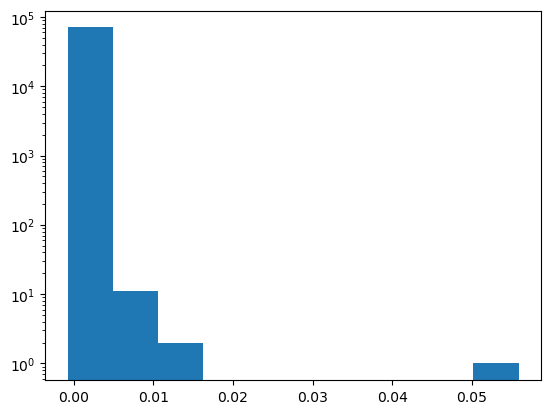

In [28]:
# Overview of distribution
plt.figure()

plt.hist(final_games['Weighted_Vote_Sentiment'], log=True)
plt.show()

In [29]:
# Creating new dataframe with only game name and weighted score
weighted_sentiment_score = pd.concat((games['Name'], final_games[['Weighted_Vote_Sentiment']]), axis=1)

In [30]:
# Sorted by highest weighted sentiment
weighted_sentiment_score.sort_values(by='Weighted_Vote_Sentiment', ascending=False).head(10)

,Name,Weighted_Vote_Sentiment
AppID,,
730,Counter-Strike: Global Offensive,0.055867
570,Dota 2,0.013154
271590,Grand Theft Auto V,0.010743
105600,Terraria,0.010552
4000,Garry's Mod,0.008868
359550,Tom Clancy's Rainbow Six® Siege,0.008840
440,Team Fortress 2,0.008574
550,Left 4 Dead 2,0.006743
252490,Rust,0.006656


It can be seen that based on the weighted voting sentiment, the top 10 recommended games would be: 
1. Counter-Strike: Global Offensive
2. Dota 2
3. Grand Theft Auto V
4. Terraria
5. Garry's Mod
6. Tom Clancy's Rainbow Six® Siege
7. Team Fortress 2 	
8. Left 4 Dead 2	
9. Rust
10. The Witcher® 3: Wild Hunt

#### Considerations for `Recommendations`:

In [31]:
# Checking distribution of games with recommendations and those with 0 recommendations. 
no_rscore = games[games['Recommendations']==0]['Recommendations'].value_counts().values[0]
yes_rscore = games[games['Recommendations']!=0]['Recommendations'].shape[0]

In [32]:
print(f'There are {no_rscore} games with no recommendations')
print(f'There are {yes_rscore} games with some number of recommendations.')

There are 57812 games with no recommendations
There are 12751 games with some number of recommendations.


In [135]:
12751/70563

0.18070376826382098

In [136]:
57812/70563

0.819296231736179

The `Recommendations` column is similar to that of `Metacritic score` in that there are a larger number of games with no recommendations compared to those with recommendations--in this case, only about 18% of games have recommendations, while the rest have none.

In [33]:
# Describe recommendation distribution
games['Recommendations'].describe()

count    7.056300e+04
mean     8.247477e+02
std      1.828137e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.441592e+06
Name: Recommendations, dtype: float64

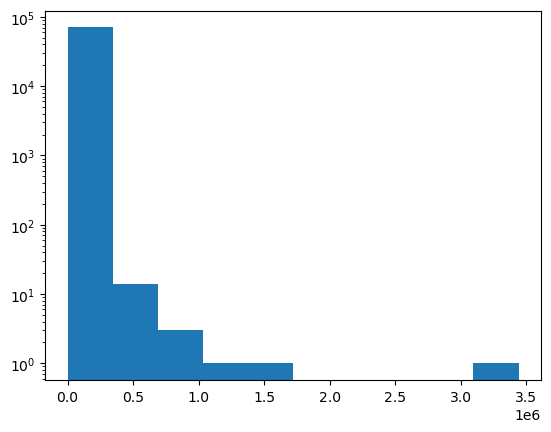

In [34]:
# Overview of recommendation distribution
plt.figure()

plt.hist(games['Recommendations'], log=True)
plt.show()

As mentioned previously, it can be seen that the majority of games do not have any cumulative number of recommendations, so for a basic recommendation system, the `Positive` vote count or `Weighted_Vote_Sentiment` may be more suitable as they have more non-zero values to work from.

*(However, there is a slightly better spread of values for `Recommendations` compared to `Positive`, so it can also be useful as a super simple/basic recommendation system.)*

In [35]:
# New dataframe with only name and recommendations
rec_count = games[['Name', 'Recommendations']]

In [36]:
# Sorting top games by recommendations
rec_count.sort_values(by='Recommendations', ascending=False).head(10)

,Name,Recommendations
AppID,,
730,Counter-Strike: Global Offensive,3441592
578080,PUBG: BATTLEGROUNDS,1616422
271590,Grand Theft Auto V,1247051
359550,Tom Clancy's Rainbow Six® Siege,899477
105600,Terraria,783469
4000,Garry's Mod,725462
252490,Rust,655687
292030,The Witcher® 3: Wild Hunt,591701
945360,Among Us,553709


The top 10 Steam games based on number of user recommendations is: 
1. Counter-Strike: Global Offensive 	
2. PUBG: BATTLEGROUNDS
3. Grand Theft Auto V
4. Tom Clancy's Rainbow Six® Siege 	
5. Terraria
6. Garry's Mod 	
7. Rust
8. The Witcher® 3: Wild Hunt 	
9. Among Us
10. Cyberpunk 2077 	

#### Comparing Rankings:


|Rank|Top 10 by Positive Votes|Top 10 by User Recommendations|Top 10 by Weighted Sentiment|
|----|------------------------|------------------------------|----------------------------|
|1.| Counter-Strike: Global Offensive| Counter-Strike: Global Offensive| Counter-Strike: Global Offensive|
|2.| Dota 2| PUBG: BATTLEGROUNDS| Dota 2|
|3.| Grand Theft Auto V| Grand Theft Auto V| Grand Theft Auto V|
|4.| PUBG: BATTLEGROUNDS| Tom Clancy's Rainbow Six® Siege| Terraria|
|5.| Terraria| Terraria| Garry's Mod|
|6.| Tom Clancy's Rainbow Six® Siege| Garry's Mod| Tom Clancy's Rainbow Six® Siege|
|7.| Team Fortress 2| Rust| Team Fortress 2|
|8.| Garry's Mod| The Witcher® 3: Wild Hunt| Left 4 Dead 2|
|9.| Rust| Among Us| Rust|
|10.| Left 4 Dead 2| Cyberpunk 2077| The Witcher® 3: Wild Hunt|

There are a lot of games that overlap between the three lists, but there are also some games such as Dota 2, Team Fortress 2, The Witcher 3, Among Us and Cyberpunk 2077 that do not appear in all lists.

This is likely due to other factors associated with these games, and they are also likely to be games with more divisive opinions. 

Additionally, these types of recommendations already exist to a certain degree on Steam as part of their "GLOBAL TOP SELLERS" and "TOP SELLERS" lists. 

#### To setup a function that will return the top unplayed games, given a list of played games:

In [37]:
# Setting up sample of games to test function on
top_50_only = weighted_sentiment_score.sort_values(by='Weighted_Vote_Sentiment', ascending=False).head(100)

In [122]:
# Checking result of new dataframe
top_50_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 730 to 220200
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     100 non-null    object 
 1   Weighted_Vote_Sentiment  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [38]:
# Test sample of 'played games' from top 50 list
test_list = list(top_50_only.sample(80).index)

In [39]:
# Creating a function that will return top unplayed games as ranked by a weighted vote sentiment
def user_independent_rec(games_list, played_games):
    """
    Get the list of top games by weighted vote sentiment that have not been played by the user.

    Parameters:
        games_list (pandas DataFrame): A pandas DataFrame that contains a list of all games to reference against
        played_games (list): A list of unique game AppIDs that represents games the user has already played
        
    Returns:
        A list of top 10 games (sorted by weighted vote sentiment) that user has not played (i.e. not in user played_games)
    """
    
    unplayed_games = games_list.index.difference(played_games) # Returns index in games_list minus index of played_games
    if unplayed_games.empty: # Checks if unplayed games list is empty
        return "There are no unplayed games available to recommend!" # Return if no unplayed games exist
 
    # Finding unplayed games from games_list based on index of unplayed_games then sort by weighted vote sentiment
    # Return only 10 entries into top unplayed
    top_unplayed_games = games_list.loc[unplayed_games].sort_values('Weighted_Vote_Sentiment', ascending=False).head(10)
    return top_unplayed_games['Name']

In [130]:
user_independent_rec(top_50_only, test_list)

AppID
730        Counter-Strike: Global Offensive
105600                             Terraria
359550      Tom Clancy's Rainbow Six® Siege
292030            The Witcher® 3: Wild Hunt
413150                       Stardew Valley
72850           The Elder Scrolls V: Skyrim
1174180               Red Dead Redemption 2
250900        The Binding of Isaac: Rebirth
960090                          Bloons TD 6
264710                           Subnautica
Name: Name, dtype: object

<a name='Cosim'></a>
### Content Similarity Recommendation Modeling

Content-based recommendations are based on matching items with similar characteristics. In the case of Steam games, that could include games with similar descriptions/about the game, matching tags (e.g. action/adventure/rpg games vs. 2d/visual novel/romance), pricing (e.g. free games, games that cost similar) and/or age-restrictions (e.g. explicit games vs family friendly games). 

Multiple features can be compared to create a similarity score using cosine similarity. These scores can then be ranked, with higher scores being more similar to the comparator game. 

The cosine similarity method will be employed below:

First, the reference list of AppID and the associated game names are loaded, since the `Name` was dropped from the original game dataset and the name will be needed for the final recommendation list. 

In [41]:
# Game AppID to Name reference list
game_names = pd.read_csv('clean_data/steam_game_id.csv')

In [42]:
# Checking dataframe
game_names.head()

,AppID,Name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


Recall that the `final_games` dataframe is comprised of multiple individual features associated with each unique game. And there is an `About the game` column that contains a short description of each game that can be vectorized from the `games` dataframe. 

#### Using Game Characteristics and Game Description (`About the game`)

The `About the game` column, as the name implies, describes what a game is about. In its current form, it cannot be parsed by any model, so it needs to be vectorized. 

The TfidfVectorizer will be emplyed to vectorize the sentences, while helping to weight unique words/tokens to specific games. 

In [137]:
games['About the game'].head()

AppID
10    Play the world's number 1 online action game. ...
20    One of the most popular online action games of...
30    Enlist in an intense brand of Axis vs. Allied ...
40    Enjoy fast-paced multiplayer gaming with Death...
50    Return to the Black Mesa Research Facility as ...
Name: About the game, dtype: object

In [45]:
# Import necessary NLP sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating vectorizer, then fitting and transforming the 'about the game' descriptions
description_vectorizer = TfidfVectorizer(stop_words = "english", min_df=1)
description_tfidf_matrix = description_vectorizer.fit_transform(games['About the game'])

In [46]:
# Checking the resultant matrix
description_tfidf_matrix

<70563x214307 sparse matrix of type '<class 'numpy.float64'>'
	with 6112353 stored elements in Compressed Sparse Row format>

In [47]:
# Importing scipy 
import scipy.sparse
from scipy.sparse import hstack

Currently the `final_games` features and the game description matrix are separate entities; ideally a combination of both should be used when running the cosine similarity, so that more information can be used to determine similarity of games. 

In [48]:
# Scaling the final game data as it encompasses a wide range of values
from sklearn.preprocessing import StandardScaler

# Instantiating standard scaler, fitting and transforming on final_game data
ss = StandardScaler()
scaled_data = ss.fit_transform(final_games)

C:\Users\ayqya\anaconda3\envs\bigdata_ml\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\ayqya\anaconda3\envs\bigdata_ml\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [49]:
# Converting to scipy coordinate format for space-saving and concatenation purposes. 
coo_scaled = scipy.sparse.coo_matrix(scaled_data)

In [50]:
# Checking datatype/sparse matrix result
coo_scaled

<70563x548 sparse matrix of type '<class 'numpy.float64'>'
	with 38668524 stored elements in COOrdinate format>

In [56]:
# Converting the tfidf matrix from csr to coo format
tfidf_matrix = description_tfidf_matrix.tocoo()

In [57]:
# Checking resultant sparse matrix
tfidf_matrix

<70563x214307 sparse matrix of type '<class 'numpy.float64'>'
	with 6112353 stored elements in COOrdinate format>

The data had to be converted to a COOrdinate format so that it could be concatenated. Without this conversion, the `scaled data` and `tfidf matrix` are too large / require too many computational resoures to concatenate. 

In [58]:
# Merge the scaled game data and the game description matrix along
all_game_info = scipy.sparse.hstack((coo_scaled,description_tfidf_matrix))

In [59]:
# Convert back to csr format to run in cosine_similarity
all_game_info = all_game_info.tocsr()

In [60]:
# Import cosine similarity library
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
# Function to run cosine similarity in small batches due to memory constraints
# NECESSARY as it would otherwise crash any computer without sufficient memory
# NOTE: batch_size = 50 runs comfortably on 32GB of RAM. Please adjust this value LOWER if computing with lower specs. 
def cosine_similarity_n_space(m1, m2, batch_size=50):
    assert m1.shape[1] == m2.shape[1]
    ret = np.ndarray((m1.shape[0], m2.shape[0]))
    for row_i in range(0, int(m1.shape[0] / batch_size) + 1):
        start = row_i * batch_size
        end = min([(row_i + 1) * batch_size, m1.shape[0]])
        if end <= start:
            break
        rows = m1[start: end]
        sim = cosine_similarity(rows, m2) # rows is O(1) size
        ret[start: end] = sim
    return ret

In [62]:
# Resultant game similarity array
game_similarity = cosine_similarity_n_space(all_game_info, all_game_info)

Please note that it took upwards of 1 hour to create this cosine similarity using batch_size = 50. Increased batch sizes will return faster results, but will require more RAM. 

Once the cosine similarity matrix has been created above, it can be tested on various sample games:

In [83]:
game_index = game_names[game_names['Name']=='Gang Beasts'].index

In [84]:
game_similarity[game_index, :]

array([[ 0.02612518,  0.03602065,  0.01325474, ..., -0.01765857,
        -0.03561277, -0.01613288]])

In [85]:
game_rec = pd.DataFrame({'game':game_names['Name'], 
                         'similarity': np.array(game_similarity[game_index, :]).squeeze()})

In [86]:
game_rec.sort_values(by='similarity', ascending=False).head(20)

,game,similarity
3002,Gang Beasts,1.000000
8282,Tricky Towers,0.756979
35585,Screaming Chicken: Ultimate Showdown,0.723335
5174,Quiplash,0.711162
35325,Bare Butt Boxing,0.709493
32591,Lunch A Palooza,0.703445
50268,Bub Block,0.670713
43592,Beat Me! - Puppetonia Tournament,0.659726
11027,Use Your Words,0.650565
37093,Bamerang,0.635605


In the event of any run-time issue, a screen captured sample of the similarity scores for the game, Gang Beasts, has been included below: 

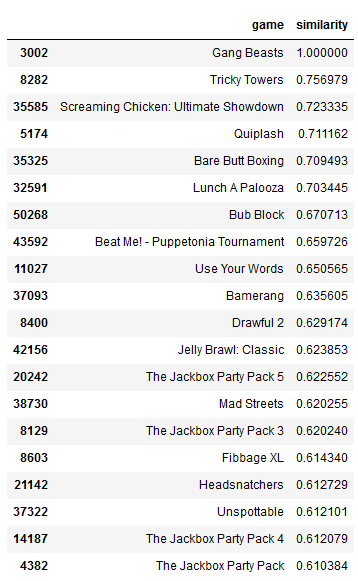

In [82]:
# Saving the model to compressed format -- requires about 37GB of storage
# np.savez_compressed('model/game_similarity', game_similarity)

Now that the single instance test has been confirmed to work, a function will be created to allow for easy running of this model. 

In [90]:
def cosim_game_rec(game_input, game_ref=game_names, cosim_matrix=game_similarity, top_n=10):
    """
    Get the top similar games to the inputed game (game_input) based on the cosine similarity matrix

    Parameters:
        game_input (str): The name of the game that is being used as the reference game to find similar games. 
        game_ref (panda series): A pandas series containing all the game names as a reference dataset.
        cosim_matrix (np.array): The cosine similarity matrix created previously (2D numpy array) that provides similarity scores for various games.
        top_n (int): The number of games to return, ordered by similarity score (high to low). Preset to 10.

    Returns:
        A DataFrame with columns 'game' and 'similarity': 
            - Game is the name of the game
            - Similarity is the score that indicates how similar the game is the the game_input (Higher number = more similar)
    """
    
    # Find the index of the target game in game_names
    game_index = game_ref[game_ref['Name'] == game_input].index

    if len(game_index) == 0:
        print("Game name not found. Perhaps there's a spelling mistake.")
        return None

    # Extract the similarity scores for the target game
    similarity_scores = cosim_matrix[game_index, :].squeeze()

    # Create a DataFrame to store the results
    game_rec = pd.DataFrame({'game': game_ref['Name'], 'similarity': similarity_scores})

    # Sort by similarity in descending order and get the top_n similar games
    top_similar_games = game_rec.sort_values(by='similarity', ascending=False).head(top_n)

    return top_similar_games

**Testing the model with various games:**

Since this is a content-based recommendation, there is no means by which accuracy / utility of these recommendations can be verified without further user input. 

Instead, heuristic knowledge of familiar games will be used to determine how well the similarity scores are performing.

In [91]:
# Testing on game, Undertale
cosim_game_rec('Undertale')

,game,similarity
6708,Undertale,1.000000
2602,Cuphead,0.623660
23891,Ultimate Custom Night,0.618434
27005,Bloons TD 6,0.616791
10522,Totally Accurate Battle Simulator,0.615884
7415,Metro Exodus,0.597821
15196,Mirror,0.578488
1934,"Papers, Please",0.567417
6557,Ori and the Blind Forest: Definitive Edition,0.564593
987,LIMBO,0.550012


Undertale is a wholesome, indie, RPG game with 2D pixelated style. It is a story-driven and meta-game.
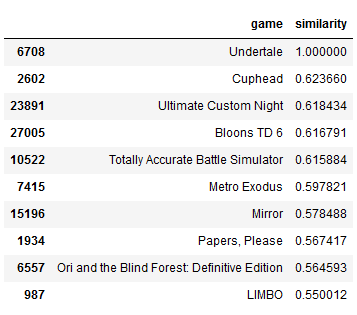

Notable results: Cuphead, Bloons TD 6, Papers Please, Ori and the Blind Forest, LIMBO
- A lot of 2D indie games, with good story. Some 3D games. 
- Art style is not similar, but all have aesthetic appeal.
- All are high quality games. 

Overall: Recommendations are varied, with differing gameplay style, but there is a high possibility that a user could enjoy all listed options. 

In [113]:
# Testing on game, Dwarf Fortress
cosim_game_rec('Dwarf Fortress')

,game,similarity
27521,Dwarf Fortress,1.000000
47252,Patron,0.680444
34460,Songs of Syx,0.669268
17072,Foundation,0.610990
32273,Founders' Fortune,0.601382
18479,After the Collapse,0.600828
40363,Against the Storm,0.594914
17759,Ingnomia,0.563048
2673,Offworld Trading Company,0.557286
16309,Academia : School Simulator,0.549761


Dwarf Fortress is more of a 2D simulation/resource management game. 
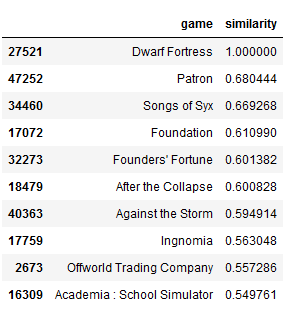

It appears that many of the listed games are primary resource management type games, which makes this list reasonable. 

In [120]:
cosim_game_rec('Devil May Cry 5')

,game,similarity
13902,Devil May Cry 5,1.000000
1009,Darksiders™,0.655512
24510,Devil's Hunt,0.642926
186,Devil May Cry® 3 Special Edition,0.632323
922,Devil May Cry 4,0.625790
14896,Devil May Cry HD Collection,0.621486
1869,METAL GEAR RISING: REVENGEANCE,0.582686
48776,[NINJA GAIDEN: Master Collection] NINJA GAIDEN Σ,0.577169
8535,Onechanbara Z2: Chaos,0.536852
9079,Bayonetta,0.533221


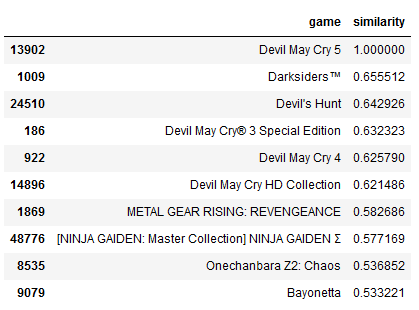

In [128]:
cosim_game_rec('DARK SOULS™: REMASTERED')

,game,similarity
12821,DARK SOULS™: REMASTERED,1.000000
14089,Darksiders III,0.641643
5810,Dragon's Dogma: Dark Arisen,0.625716
4506,DARK SOULS™ II: Scholar of the First Sin,0.594203
19389,A Plague Tale: Innocence,0.548630
6078,DARK SOULS™ III,0.537160
15362,Ashen,0.535056
2520,Lords Of The Fallen™,0.516719
8089,Slime Rancher,0.486511
10410,Celeste,0.481359


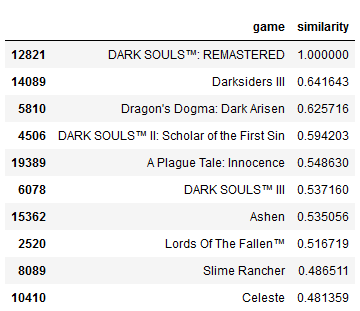

Other well-known games, such as Dark Souls and Devil May Cry 5, have also been tested as noted above. The similarity score was able to pull other games within the franchise, and it appears that the other recommendations have points of commonality based on what is known about these games. 

In [92]:
# Testing incorrect input
cosim_game_rec('Betterbit')

Game name not found. Perhaps there's a spelling mistake.


If the game input is incorrect, then a statement is returned asking the user to check the spelling. 

The input, game name, is not very robust as it requires exact matching to return a result. For future consideration, to make this function applicable to a broader user-base, a more generalized input system can be created. 

In [143]:
cosim_game_rec('Terraria')

,game,similarity
1242,Terraria,1.000000
2680,Grand Theft Auto V,0.926725
5491,Tom Clancy's Rainbow Six® Siege,0.923435
2203,Rust,0.890462
24703,Valheim,0.873757
37369,ELDEN RING,0.866080
1613,PAYDAY 2,0.813686
26486,Among Us,0.810333
140,Garry's Mod,0.794845
21,Left 4 Dead 2,0.756753


<a name='Conclude'></a>
## Concluding Remarks

A content-based system is quite robust on its own as can be seen by some of the test results above; even when the relationship between recommended games is not apparent, the games being recommended are subjectively of high quality (and relatively well-known). 

Expanding this further would require significantly more resources than is available on this project, so next steps would be to scale the data and increase the number of features/factors being comapred.